# Final Project - Individual Portion
### Data Science for Biology
**Notebook developed by:**  *Max Staller*, *Kinsey Long*<br>

### Individual Project Instructions
We expect you all to work individually on the individual portion of the final project. You may consult your notes from class, PANDAS documentation, and internet sources like StackExchange. You may not use any large language model (e.g. ChatGPT, Github copilot, etc). 

**As the last portion of the project, you will hand write and sign the following statement, take a picture of it and upload it as part of your individual project submission.** <br>
“I pledge my honor, I have neither given nor received inappropriate assistance in the completion of the individual portion of this final project." <br>
 [sign your name. Date]


In [1]:
#Just run this cell to import packages
!pip install seaborn==0.13.2
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


## Part 1: Multiplicity of Infection

CRISPR-Cas9 targeting is supported by guide RNA (gRNA) which bind to complementary sequences in the genome. This binding causes gRNA to form a complex with the Cas9 enzyme, triggering a conformational change and allowing it to cleave the DNA. From there, genes can be inserted or deleted and DNA repair mechanisms are engaged.

Your labmate is designing a targeted CRISPR screen in K562 cells. They come to you for help designing the experiment. The cells all carry a Cas9 transgene. Your labmate is transducing cells with lentiviruses-carrying guide RNAs and a puromycin resistance gene. Lentiviruses integrate into the genome at nearly random locations.

In this particular case, it is really important to ensure that fewer than 10% of the cells receive 2 or more guide RNAs. Help your labmate choose the appropriate multiplicity of infection (MOI).

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 1a**:</font> What probability distribution will help you solve this problem? (1 point)

Well since we want to ensure that fewer than 10% if the cells receive 2 or more guide RNAs, the Poisson distribution is the appropriate probability distribution here given our assumptions

<font color = #d14d0f>**QUESTION 1b**:</font> Write a function `calculateIntegrationRates` that takes the multiplicity of infection (MOI) as an input and returns the fraction of cells with 1 integration and the fraction of cells with 2 or more integrations, **rounded to 5 decimal places**. Assume that 95% of virus particles integrate. (5 points)

In [ ]:
# YOUR CODE HERE
def calculateIntegrationRates(MOI):
    moi_effective = MOI * 0.95

    # now we calc the P(x=k) for k=0, 1 and then we needa one for k>= 2
    p_0 = math.exp(-moi_effective)
    p_1 = moi_effective * math.exp(-moi_effective)
    p_2_and_more = 1 - p_0 - p_1

    fraction_1integration = round(p_1, 5)
    fraction_2integrations = round(p_2_and_more, 5)
    return fraction_1integration, fraction_2integrations 

<font color = #d14d0f>**QUESTION 1c**:</font> What is the highest MOI (to 3 decimal places) your labmate can use to ensure <10% of cells have 2 or more integrations? Assign your result to `poisson_prob`. (3 points)

In [9]:
calculateIntegrationRates(0.559)

(0.31225, 0.09976)

In [8]:
# YOUR CODE HERE
# note I tried solve for a numerical solution but got a transcendental equation
# which has no closed form solution, so I just brute forced it as seen above
q1c_highest_MOI = 0.559

print(f"The highest MOI (to 3 d.p) to ensure <10% of cells have at least 2 integrations is {q1c_highest_MOI}")

The highest MOI (to 3 d.p) to ensure <10% of cells have at least 2 integrations is 0.559


<font color = #d14d0f>**QUESTION 2a**:</font> Next, you will model the puromycin survival rate. Start by assuming that 100% of cells with a puromycin resistance gene survive and 100% of cells without an integration die. Start with an MOI of 0.4. What fraction of cells have 1 integration? Assign your result to `frac_1_integration` Out of all of the cells that survive, what fraction of them have only 1 integration? Assign that result to `frac_1_integration_survived`. As usual, round your answers to 3 decimal places. (2 points)

In [23]:
# YOUR CODE HERE
MOI = 0.4
moi_effective = MOI * 0.95

# Again I gues we just calculate the poisson probabilties
p_0 = math.exp(-moi_effective)
p_1 = moi_effective * math.exp(-moi_effective)

frac_1_integration = round(p_1, 3)
frac_1_integration_survived = round(p_1 / (1 - p_0), 3)

print(f"{frac_1_integration} of cells had 1 integration.")
print(f"{frac_1_integration_survived} of survived cells had 1 integration.")

0.26 of cells had 1 integration.
0.822 of survived cells had 1 integration.


<font color = #d14d0f>**QUESTION 2b**:</font> Drug selection in human cell culture is never perfect. Next, assume that 85% of cells with a puromycin resistance gene survive and 95% of cells without an integration die. Use an MOI of 0.4. Among the cells that survive, what fraction have 1 integration? Assign your result to `q1e_frac_1_integration_survival`, a float that is rounded to 3 decimal places. (3 points)

In [26]:
# YOUR CODE HERE
MOI = 0.4
moi_effective = MOI * 0.95

p_0 = math.exp(-moi_effective)
p_1 = moi_effective * math.exp(-moi_effective)
p_2_and_more = 1 - p_0 - p_1

# now we just use conditional probability i think
# we want the P(x=1 | survived)

survive_0 = p_0 * (1 - 0.95)
survive_1 = p_1 * 0.85
survive_2 = p_2_and_more * 0.85

total_survive = survive_0 + survive_1 + survive_2

q1e_frac_1_integration_survival = round(survive_1 / total_survive, 3)

print(f"{q1e_frac_1_integration_survival} of surviving cells had 1 integration.")

0.729 of surviving cells had 1 integration.


<font color = #d14d0f>**QUESTION 3**:</font> Your labmate’s screen has 400 target genes, each with 18 guide RNAs, all marked by puromycin resistance. The screen also includes 100 control guide RNAs. 

They want each guide RNA integrated into at least 500 cells. What is the minimum number of integrations they need? What is the minimum number of cells they need to start with in the experiment? Edit the provided print statement with your answer, <b>making sure to provide each answer with 3 significant figures</b>.

As above, you should also assume that only 85% of cells with a puromycin resistance gene survive and puromycin kills 95% of cells without the resistance gene. Use an MOI of 0.4. Assign your final result to `q3_min_cells`, which should be an integer.

In [34]:
# YOUR CODE HERE
num_grnas = 400 * 18 + 100 # assuming the control wasn;t part of the 400
num_integrated_cells_per_grna = 500
survival_rate_with_integration = 0.85
survival_rate_without_integration = 1 - 0.95
MOI = 0.4
moi_effective = MOI * 0.95

# min num integrations
total_integrations = round(num_grnas * num_integrated_cells_per_grna, -3)

# ok and since we use poisson, the E[x] = lambda = our effective moi hereee
expected_integrations_per_cell = moi_effective

# now we get the poisson probabilities
p_0 = math.exp(-expected_integrations_per_cell)
p_1 = expected_integrations_per_cell * math.exp(-expected_integrations_per_cell)
p_2_and_more = 1 - p_0 - p_1

total_survival_frac = (p_0 * survival_rate_without_integration) + (p_1 * survival_rate_with_integration) + (p_2_and_more * survival_rate_with_integration)

cells_required = total_integrations / expected_integrations_per_cell
q3_min_cells = round(math.ceil(cells_required / total_survival_frac), -5)

print(f"There are a total of {total_integrations} integrations.")
print(f"Your labmate should use at least {q3_min_cells} cells.")

There are a total of 3650000 integrations.
Your labmate should use at least 31700000 cells.


<font color = #d14d0f>**QUESTION 4**:</font> Make a seaborn line plot showing the fraction of surviving cells with one integration (y-axis) vs MOI. Plot 3 different puromycin efficiencies (100%, 80%, 60%) in different colors, with MOI values between 0 to 3. Ensure your visualization has appropriate title, labels and legend. As above, assume puromycin kills 95% of cells without the resistance gene. (3 points)

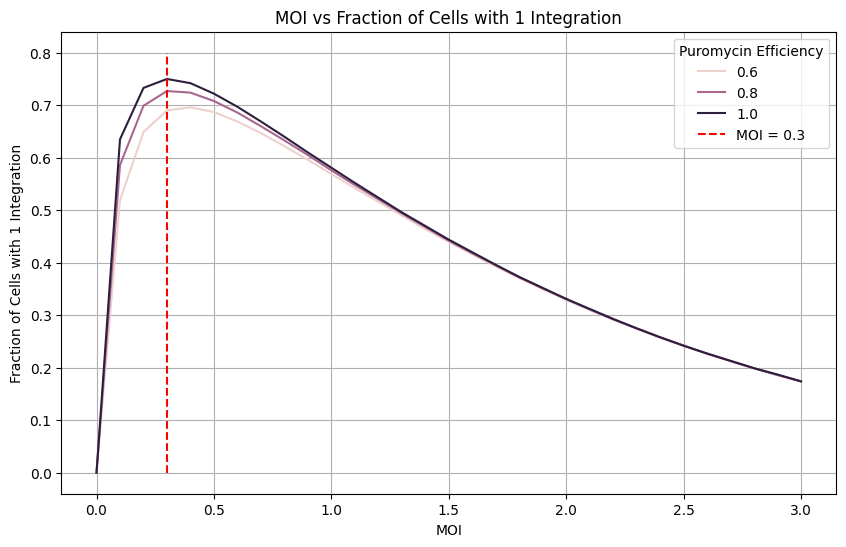

In [46]:
# YOUR CODE HERE
puromycin_efficiencies = [0.6, 0.8, 1]
MOIs = np.arange(0, 3.1, 0.1)
integration_efficiency = 0.95
survival_rate_without_integration = 1 - 0.95

df = []

for efficiency in puromycin_efficiencies:
    for MOI in MOIs:
        moi_effective = MOI * integration_efficiency

        # poisson probs
        p_0 = math.exp(-moi_effective)
        p_1 = moi_effective * math.exp(-moi_effective)
        p_2_and_more = 1 - p_0 - p_1

        # survival rates
        survive_0 = p_0 * survival_rate_without_integration
        survive_1 = p_1 * efficiency
        survive_2 = p_2_and_more * efficiency

        total_survive = survive_0 + survive_1 + survive_2
        fraction_survived_with_integration = round(survive_1 / total_survive, 3)

        df.append({
            'MOI': MOI,
            'Puromycin Efficiency': efficiency,
            'Fraction Survived with Integration': fraction_survived_with_integration
        })

# imma make a dataframe since that's easier to work wit
df = pd.DataFrame(df)

# plotting stuff
plt.figure(figsize=(10, 6))
plt.ylabel("Fraction of Cells with 1 Integration")
plt.xlabel("MOI")
plt.title("MOI vs Fraction of Cells with 1 Integration")
sns.lineplot(data=df, x='MOI', y='Fraction Survived with Integration', hue='Puromycin Efficiency')
plt.vlines(x=0.3, color='red', linestyle='--', ymin=0, ymax=0.8, label='MOI = 0.3')
plt.legend(title='Puromycin Efficiency', loc='upper right')
plt.grid(True)
plt.show()

<font color = #d14d0f>**QUESTION 4b**:</font> Describe what you see in the plot.

Firstly, I observe that the fraction of surviving cells with exactly 1 integration rises quickly with increasing MOI and peaks around a neighborhood of 0.3. After this peak, the fraction declines steadily since higher MOIs lead to  more cells getting multiple integrations. So really there seems to be a sweet spot in choosing our MOI parameter in order to maximize the single gRNA integration in surviving cells. That sweet spots seems to be an MOI of 0.3

What parameter is most important for ensuring cells get 1 integration per cell?

As hinted from the questions, it definitely seems like the most important parameter here is the multiplicity of infection (MOI) since this directly controls how many viral particles each cell receives on average

<!-- END QUESTION -->

## Part 2: Data Science Practices


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 5**:</font> Suppose you have a pandas DataFrame containing containing drug screening data with columns representing different compounds and rows representing cell lines. There is also a control column. The values in the DataFrame are the cell viability percentage, which correspond to the impact of the drugs on the cell lines. You have another DataFrame that contains a row for each cell line, with data for the organ and organism it was from. 

Answer each of the sub-questions below. For each question, explicitly reference at least one pandas, scipy or seaborn method.

_in answering the questions below, I denote the pandas DataFrame as `df`_

a) How would you inspect the data to get a broad overview? (1 point) <br>
In general, I would call `df.head()` to view the first 5 rows. For summary statistics for each compound, I would call `df.describe()`. I also like checking for missing values and duplicate values, which can be done with `df.isna().sum()` and `df.duplicated()` respectively

b) How would you determine which drug is the most toxic across all of the cell lines? (2 points) <br>
It would depend on the skew of the data, so assuming my data is not skewed, I would first drop the control column, then simply take the column means and get the minimum of those means since it was state the the values represent cell viability percentage. Intuitively, the cell with the lowest viability percentage should correspond to the cell that was most impacted by the drug. If the data was skewed however, I would use a more robust measure like the median. It would look like this method chain: 

```
df.drop(columns='control').mean().idxmin()
```

c) For any given drug, how would you determine which organism it impacted the most? (3 points) <br>
I would have to perform a `df.merge()` between the drug data with the other dataframe. Then we simply have to take the `merged_df.groupby('organism')` and again do something similar to part b where we take the mean and get the minimum for that drug

d) How would you statistically determine if a cell line is significantly impacted by a specific drug? (2 points) <br>
To do this I would perform a paired t-test by comparing the drug column and the control column. Conveniently, `scipy` has a method that allows us to perform the test out of the box by doing:

`ttest_rel(df['Drug'], df['control'])`

Then at a 95% confidence interval, if the p-value is less than 0.05, we can conclude that the drug significantly reduces viability compared to the control in that cell line

e) Describe and outline a visualization you would create and why it might be relevant. (1 point) <br>
I would create a single violin plot per drug displayed side by side to visualize the distribution of cell viability for each drug across the cell lines. My goal would to be to reveal whether the response is skewed or highly variable which may inform further data preprocessing protocols

<!-- END QUESTION -->

## Part 3: Cas9 Cutting

PAM is a short DNA sequence that is recognized by the Cas9 enzyme and is essential for its function in CRISPR gene editing. Cas9 requires a specific PAM sequence adjacent to the target DNA sequence in order to bind and initiate the DNA cleavage process. The PAM sequence varies depending on the type of Cas9 protein used, with different Cas9 orthologs recognizing different PAM sequences. Commonly used Cas9 proteins, such as the *Streptococcus pyogenes* Cas9 (SpCas9), recognize a PAM sequence consisting of the nucleotides NGG (where N can be any nucleotide). 

CRISPR-Cas9 finds and cuts target protospacer DNA precisely 3 base pairs upstream of a PAM.

<font color = #d14d0f>**QUESTION 6a**:</font> How often do you expect an NGG PAM motif to appear in a random DNA sequence that is 30,000 nucleotides long? Assume that the probability of observing NGG at any position in the sequence is independent of one another. Assume GC = 45%. Assign your answer to `q6a_answer`. (2 points)

In [3]:
# YOUR CODE HERE
dna_seq_length = 30_000
gc_content = 0.45

probability_G = 0.5 * gc_content
probability_C = 0.5 * gc_content
probability_N = 1

probability_NGG = probability_N * probability_G * probability_G
expected_NGG_motifs = dna_seq_length * probability_NGG
q6a_answer = int(round(expected_NGG_motifs, 0))

print(f"In a 10,000 nt long random DNA sequence, we expect to see {q6a_answer} number of NGG motifs.")

In a 10,000 nt long random DNA sequence, we expect to see 1519 number of NGG motifs.


<font color = #d14d0f>**QUESTION 6b**:</font> What is the expected number of possible cut site locations in a 30,000 nt random DNA could be edited using an NGG PAM sequence. Use the same assumption as in Q6a, and make sure to consider both DNA strands. (1 point)

In [ ]:
# YOUR CODE HERE
dna_seq_length = 30_000
gc_content = 0.45

probability_G = 0.5 * gc_content
probability_C = 0.5 * gc_content

probability_PAM = probability_G * probability_G

expected_PAM_motifs = dna_seq_length * probability_PAM * 2 # RMB TIMES 2 to account for both strands

q6b_answer = int(round(expected_PAM_motifs, 0))

print(f"In a 10,000 nt long random DNA sequence, we expect to see {q6b_answer} possible cut sites.")

In a 10,000 nt long random DNA sequence, we expect to see 3038 possible cut sites.


<font color = #d14d0f>**QUESTION 6c**:</font> Build a function `calculateCoverage(PAM_seq, DNA_length)` that calculates the expected proportion of the DNA cut sites that could be genetically engineered with those given parameters. The PAM sequence can be any sequence of "N", "A", "T", "C" and/or "G", of any length. Use the same assumptions in Q6a and Q6b. (3 point)

In [ ]:
# YOUR CODE HERE
def calculateCoverage(PAM_seq, DNA_length):
    # probsbabilties
    probs = {
        'A': 0.275,
        'C': 0.275,
        'G': 0.225,
        'T': 0.225,
        'N': 1.0
    }

    # get the pam pronbs
    pam_prob = 1
    for base in PAM_seq:
        pam_prob *= probs.get(base.upper(), 0) # i wanna standardize the base to upper case

    expected_pams = 2 * DNA_length * pam_prob

    coverage = expected_pams / DNA_length
    return coverage

' # BEGIN PROMPT\ndef calculateCoverage(PAM_seq, DNA_length):\n    ...\n    return ...\n'

<font color = #d14d0f>**QUESTION 7**:</font> Suppose you want to genetically edit a specific nucleotide in a 30,000 nt random DNA sequence. What is the minimum gRNA sequence length you would need for the gRNA sequence to only appear once in random DNA? Assign your answer to `q7_min_grna_length`. Assume the gRNA sequence does not include an "N". You can assume equal distribution here. (3 points)

In [10]:
# YOUR CODE HERE
dna_seq_length = 30_000
threshold = 1 # since we want to expect only 1 occurrence

# i will loop over some possible gRNA lengths
for L in range(1, 100):
    prob_seq = 0.25 ** L
    expected_occurrences = (dna_seq_length) * prob_seq
    if expected_occurrences <= threshold:
        q7_min_grna_length = L
        break

print(f"The minimum gRNA length needed to expect the sequence to only appear once is {q7_min_grna_length}.")

The minimum gRNA length needed to expect the sequence to only appear once is 8.


## Part 4: CODIS

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 8**:</font> Describe two quantitative metrics that can be used to assess the degree of similarity between two CODIS STR fingerprints. Provide one limitation of each metric. At least one of the metrics should be one that was covered in class. (4 points)

##### BEGIN SOLUTION

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 9**:</font> What are some additional considerations and limitations of using CODIS to predict the degree of relation between two individuals? (2 points)

##### BEGIN SOLUTION

## Part 5: Assessing Model Performance

For the following questions, please refer to the table below, which shows results for 4 different supervisied machine learning models that were used to classify different cell types.

In [12]:
#Just run this cell
part6_df = pd.DataFrame({ 
    "Model": ["Model 1", "Model 2", "Model 3", "Model 4"],
    "TP": [52, 91, 484, 959],
    "TN": [47, 885, 107, 959],
    "FP": [42, 18, 410, 32],
    "FN": [54, 405, 78, 58]
})
part6_df

,Model,TP,TN,FP,FN
0,Model 1,52,47,42,54
1,Model 2,91,885,18,405
2,Model 3,484,107,410,78
3,Model 4,959,959,32,58


<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 10**:</font>  <br>
a) How do each of these models compare to a model that randomly guesses a diagnosis? (1 point) <br>
b) Which model do you think performed the best for diagnosing classes of cells and why?  (1 point) <br>
c) For model 1, describe a circumstance where you think this model would be considered the best performing model. (1 point) <br>
d) For model 2, describe a circumstance where you think this model would be considered the best performing model. (1 point) <br>
e) For model 3, describe a circumstance where you think this model would be considered the best performing model. (1 point) <br>


**Question 10 Response:** <br>

a) *Double-click to type your answer here* 
<br>
b) *Double-click to type your answer here* 
<br>
c) *Double-click to type your answer here* 
<br>
d) *Double-click to type your answer here* 
<br>
e) *Double-click to type your answer here* 


## Part 6: Machine Learning

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 11**:</font>  <br>
What is the difference between supervised and unsupervised machine learning? Give two biological scenarios, outside of the ones we did in class, where each method would be appropriate. (4 points) <br>


**Question 14 Response:** <br>

b) *Double-click to type your answer here* 
<br>

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 12**:</font> Suppose you want to conduct an analysis on [this enhancer database](http://www.computationalbiology.cn/RAEdb/index.php) to develop some kind of machine learning model. Outline a machine learning tool that you could build to explore or analyze this data. (6 points)

> Feel free to [read the corresponding PubMed article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6323319/) to learn more about the data.

1. State your goal. *Double-click to type your answer here.*
2. State what data you would use. *Double-click to type your answer here.*
3. Outline your tool. *Double-click to type your answer here.*
4. How could you evaluate your model? *Double-click to type your answer here.*